In [17]:
import os
import sys
import json
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from project_app.app_settings import orchard
import matplotlib.pyplot as plt

In [18]:
# Cztery zestawy parametrów
algorithm_settings = {
#     "set1":{"T_start": 5000,
#            "T_stop": 1000,
#            "iterations_in_temp": 100,
#            "epsilon": 5,
#            "iterations_epsilon": 100,
#            "alpha": 0.99,
#            "initial_sol": [3, 18],
#            "verbose": False},
    
    "set2":{"T_start": 5000,
           "T_stop": 1000,
           "iterations_in_temp": 500,
           "epsilon": 5,
           "iterations_epsilon": 500,
           "alpha": 0.99,
           "initial_sol": [3, 18],
           "verbose": False},
    
    
    "set3":{"T_start": 5000,
           "T_stop": 1000,
           "iterations_in_temp": 100,
           "epsilon": 5,
           "iterations_epsilon": 100,
           "alpha": 0.95,
           "initial_sol": [3, 18],
           "verbose": False},
       

    "set4":{"T_start": 5000,
           "T_stop": 1000,
           "iterations_in_temp": 100,
           "epsilon": 5,
           "iterations_epsilon": 100,
           "alpha": 0.999,
           "initial_sol": [3, 18],
           "verbose": False},

#     "set5":{"T_start": 1000,
#            "T_stop": 10,
#            "iterations_in_temp": 100,
#            "epsilon": 5,
#            "iterations_epsilon": 100,
#            "alpha": 0.99,
#            "initial_sol": [3, 18],
#            "verbose": False},
       
}

In [19]:
# Słownik different_results służy do przechowywania
# wyników poszczególnych eksperymentów dla różnych 
# zestawów parametrów.
different_results = dict()

for key, settings in algorithm_settings.items():
    # Pętla po poszczególnych zestawach parametrów

    results = []
    T_start = settings["T_start"]
    T_stop = settings["T_stop"]
    iters_temp = settings["iterations_in_temp"]
    eps = settings["epsilon"]
    iters_eps = settings["iterations_epsilon"]
    a = settings["alpha"]
    init_sols = settings["initial_sol"]
    verbose = settings["verbose"]

    for sol in init_sols:
        for i in range(10):
        # 10 krotne uruchomienie algorytmu z tymi samymi ustawieniami
        # oraz zapisanie każdego wyniku do listy results
            print(key, i)
            _, _, _, profit = orchard.simulated_annealing(T_start=T_start, T_stop=T_stop,
                                                iterations_in_temp=iters_temp, epsilon=eps, iterations_epsilon=iters_eps, 
                                                alpha=a, initial_sol=sol, verbose=verbose)
            results.append((profit, len(profit)))
        
    # Przypisanie wyników ekperymentu do 
    # odpowiedniego zestawu parametrów
    different_results[key] = results

set2 0
kryt stopu 1
set2 1
kryt stopu 1
set2 2
kryt stopu 1
set2 3
kryt stopu 1
set2 4



Wyniki dla zestawu ustawień z set2 (Rozwiązanie początkowe=3)
Zysk: 4815.60 | Iteracje: 49
Zysk: 4832.70 | Iteracje: 75
Zysk: 4851.60 | Iteracje: 109
Zysk: 4839.50 | Iteracje: 111
Zysk: 4806.10 | Iteracje: 35
Zysk: 4847.00 | Iteracje: 76
Zysk: 4908.20 | Iteracje: 147
Zysk: 4813.30 | Iteracje: 45
Zysk: 4929.50 | Iteracje: 136
Zysk: 5016.50 | Iteracje: 214
Średni zysk: 4866.00
Mediana zysku: 4843.25

Wyniki dla zestawu ustawień z set2 (Rozwiązanie początkowe=18)
Zysk: 5311.80 | Iteracje: 515
Zysk: 4818.10 | Iteracje: 209
Zysk: 4969.00 | Iteracje: 312
Zysk: 4793.80 | Iteracje: 87
Zysk: 4960.00 | Iteracje: 50
Zysk: 5051.60 | Iteracje: 45
Zysk: 5001.20 | Iteracje: 110
Zysk: 5057.00 | Iteracje: 224
Zysk: 4838.50 | Iteracje: 85
Zysk: 4808.70 | Iteracje: 138
Średni zysk: 4960.97
Mediana zysku: 4964.50



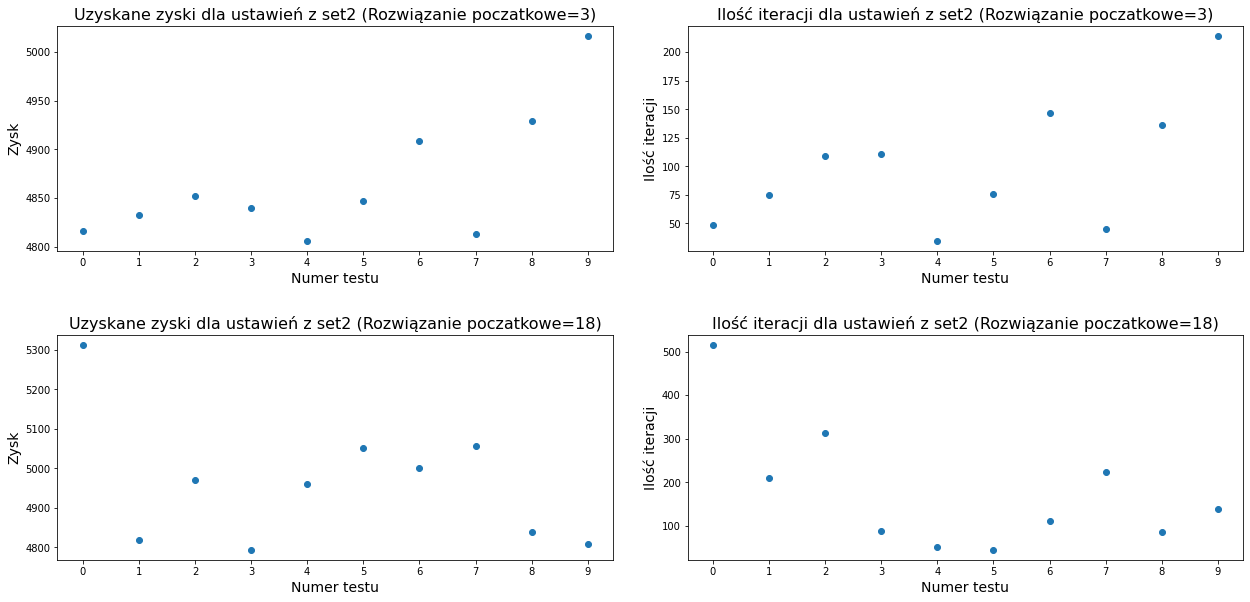

In [ ]:
# Słownik test_results służy do zapisania wyników
# eksperymentu do pliku JSON
test_results = {"settings":algorithm_settings}


for key, results in different_results.items():
    # Pętla po poszczególnych zestawach parametrów
    # wraz z ich wynikami eksperymentów.
    
    test_results[key] = {"zyski":{},
                         "iteracje":{}}
    fig, ax = plt.subplots(2,2,figsize=(18, 9))
    profits = [] # lista do zapisu zysków dla danego zestawu parametrów
    iterations = [] # lista do zapisu ilości iteracji dla danego zestawu parametrów
    txt = ""
    for i, el in enumerate(results):
        # Pętla po poszczególnych wynikach
        # dla danego zestawu parametrów.
        profits.append(el[0])
        iterations.append(el[1])
        test_results[key]["zyski"][i] = el[0]
        test_results[key]["iteracje"][i] =  el[1]


    profits = [max(i) for i in profits]
    # print(profits)
    txt += f"\nWyniki dla zestawu ustawień z {key} (Rozwiązanie początkowe=3)\n"
    for profit in range(len(profits[:10])):
        # print(profits[profit])
        txt += "Zysk: {:.2f} | Iteracje: {}\n".format(profits[profit], iterations[profit])
    average_profit_sol3 = np.average(np.array(profits[:10]))
    median_profit_sol3 = np.median(np.array(profits[:10]))
    txt += "Średni zysk: {:.2f}\n".format(average_profit_sol3)
    txt += "Mediana zysku: {:.2f}\n".format(median_profit_sol3)
    test_results[key]["sredni_zysk_sol3"] = average_profit_sol3
    test_results[key]["mediana_zysku_sol3"] = median_profit_sol3

    txt += f"\nWyniki dla zestawu ustawień z {key} (Rozwiązanie początkowe=18)\n"
    for profit in range(len(profits[10:])): 
        # print(profits[profit+10])
        txt += "Zysk: {:.2f} | Iteracje: {}\n".format(profits[profit+10], iterations[profit+10])
    average_profit_sol18 = np.average(np.array(profits[10:]))
    median_profit_sol18 = np.median(np.array(profits[10:]))
    txt += "Średni zysk: {:.2f}\n".format(average_profit_sol18)
    txt += "Mediana zysku: {:.2f}\n".format(median_profit_sol18)
    test_results[key]["sredni_zysk_sol18"] = average_profit_sol18
    test_results[key]["mediana_zysku_sol18"] = median_profit_sol18
    
    print(txt)
    

    ax[0,0].scatter([i for i in range(len(results[:10]))], profits[:10])
    ax[0,0].set_title(f"Uzyskane zyski dla ustawień z {key} (Rozwiązanie poczatkowe=3)", fontsize=16)
    ax[0,0].set_xlabel("Numer testu", fontsize=14)
    ax[0,0].set_ylabel("Zysk", fontsize=14)
    ax[0,0].set_xticks(np.arange(0, 10, step=1))
    # ax[0].set_ylim([5800, 7200])
    
    ax[0,1].scatter([i for i in range(len(profits[:10]))], iterations[:10])
    ax[0,1].set_title(f"Ilość iteracji dla ustawień z {key} (Rozwiązanie poczatkowe=3)", fontsize=16)
    ax[0,1].set_xlabel("Numer testu", fontsize=14)
    ax[0,1].set_ylabel("Ilość iteracji", fontsize=14)
    ax[0,1].set_xticks(np.arange(0, 10, step=1))
    # ax[1].set_ylim([1500, 3100])

    ax[1,0].scatter([i for i in range(len(results[10:]))], profits[10:])
    ax[1,0].set_title(f"Uzyskane zyski dla ustawień z {key} (Rozwiązanie poczatkowe=18)", fontsize=16)
    ax[1,0].set_xlabel("Numer testu", fontsize=14)
    ax[1,0].set_ylabel("Zysk", fontsize=14)
    ax[1,0].set_xticks(np.arange(0, 10, step=1))


    ax[1,1].scatter([i for i in range(len(profits[:10]))], iterations[10:])
    ax[1,1].set_title(f"Ilość iteracji dla ustawień z {key} (Rozwiązanie poczatkowe=18)", fontsize=16)
    ax[1,1].set_xlabel("Numer testu", fontsize=14)
    ax[1,1].set_ylabel("Ilość iteracji", fontsize=14)
    ax[1,1].set_xticks(np.arange(0, 10, step=1))


    fig.tight_layout(pad=3)
    
    plt.show()

# with open('wyniki/testy_sa.json', 'w') as outfile:
    # json.dump(test_results, outfile)